In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random

from keras.datasets import mnist
from keras.models import Sequential

from keras.layers.core import Dense, Dropout, Activation
from keras.utils import np_utils

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

print("X_train shape", X_train.shape)
print("y_train shape", y_train.shape)
print("X_test shape", X_test.shape)
print("y_test shape", y_test.shape)

11490434/11490434 [==============================] - 0s 0us/step
X_train shape (60000, 28, 28)
y_train shape (60000,)
X_test shape (10000, 28, 28)
y_test shape (10000,)


In [4]:
test_data = pd.read_csv('/content/drive/MyDrive/ML Porject/digital_letters.csv', delimiter = ',', header = 0, usecols = [x for x in range(0, 784)])

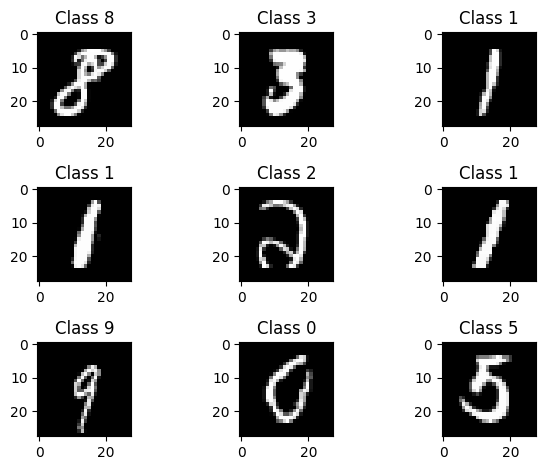

In [5]:
for i in range(9):
    plt.subplot(3,3,i+1)
    num = random.randint(0, len(X_train))
    plt.imshow(X_train[num], cmap='gray', interpolation='none')
    plt.title("Class {}".format(y_train[num]))

plt.tight_layout()

In [6]:
X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

X_train /= 255
X_test /= 255

print("Training matrix shape", X_train.shape)
print("Testing matrix shape", X_test.shape)

Training matrix shape (60000, 784)
Testing matrix shape (10000, 784)


In [7]:
no_classes = 10

Y_train = np_utils.to_categorical(y_train, no_classes)
Y_test = np_utils.to_categorical(y_test, no_classes)

In [8]:
model = Sequential()

In [9]:
model.add(Dense(512, input_shape=(784,)))

In [10]:
model.add(Activation('relu'))

In [11]:
model.add(Dropout(0.2))

In [12]:
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.2))

In [13]:
model.add(Dense(10))
model.add(Activation('softmax'))

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               401920    
                                                                 
 activation (Activation)     (None, 512)               0         
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 512)               262656    
                                                                 
 activation_1 (Activation)   (None, 512)               0         
                                                                 
 dropout_1 (Dropout)         (None, 512)               0         
                                                                 
 dense_2 (Dense)             (None, 10)                5

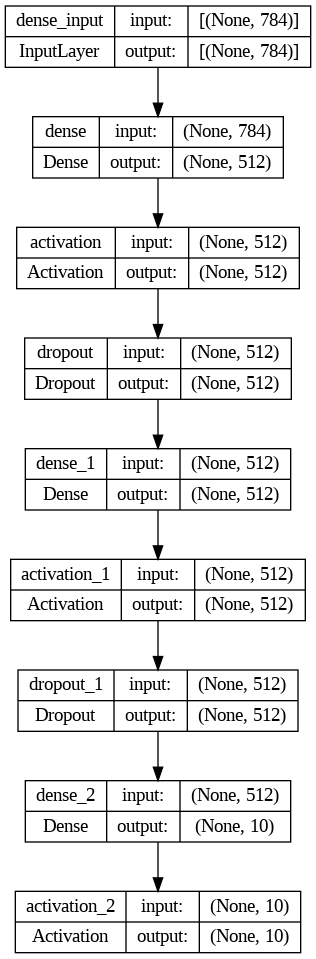

In [15]:
from keras.utils import plot_model
plot_model(model, to_file='model_chart.png', show_shapes=True, show_layer_names=True)
from IPython.display import Image
Image("model_chart.png")

In [16]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [17]:
history = model.fit(X_train, Y_train,
          batch_size=128, epochs=10,
          verbose=1)

Epoch 1/10
469/469 [==============================] - 15s 26ms/step - loss: 0.2487 - accuracy: 0.9251
Epoch 2/10
469/469 [==============================] - 11s 22ms/step - loss: 0.0999 - accuracy: 0.9689
Epoch 3/10
469/469 [==============================] - 9s 19ms/step - loss: 0.0699 - accuracy: 0.9779
Epoch 4/10
469/469 [==============================] - 12s 26ms/step - loss: 0.0553 - accuracy: 0.9829
Epoch 5/10
469/469 [==============================] - 11s 23ms/step - loss: 0.0445 - accuracy: 0.9850
Epoch 6/10
469/469 [==============================] - 9s 19ms/step - loss: 0.0399 - accuracy: 0.9870
Epoch 7/10
469/469 [==============================] - 10s 22ms/step - loss: 0.0341 - accuracy: 0.9884
Epoch 8/10
469/469 [==============================] - 11s 23ms/step - loss: 0.0300 - accuracy: 0.9898
Epoch 9/10
469/469 [==============================] - 9s 20ms/step - loss: 0.0288 - accuracy: 0.9907
Epoch 10/10
469/469 [==============================] - 10s 21ms/step - loss: 0.0256 -

In [18]:
score = model.evaluate(X_test, Y_test)
print('Test accuracy:', score[1])

313/313 [==============================] - 2s 6ms/step - loss: 0.0671 - accuracy: 0.9825
Test accuracy: 0.9825000166893005


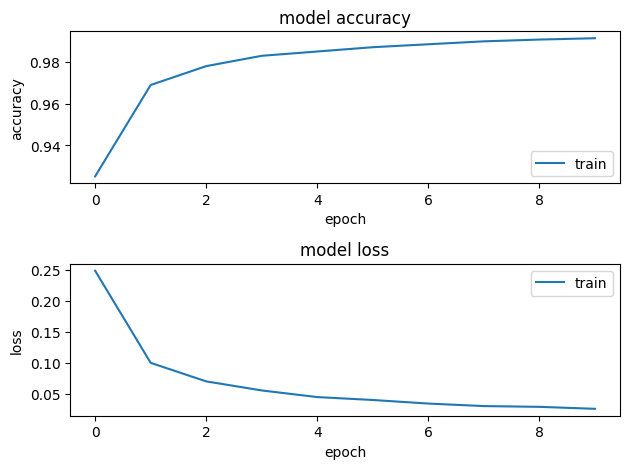

In [27]:
fig = plt.figure()
plt.subplot(2,1,1)
plt.plot(history.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')

plt.subplot(2,1,2)
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')

plt.tight_layout()


In [28]:
results = model.predict(test_data)

411/411 [==============================] - 1s 3ms/step


In [29]:
results = np.argmax(results,axis = 1)
results = pd.Series(results,name="Label")
submission = pd.concat([pd.Series(range(1,28001),name = "ImageId"),results],axis = 1)

submission.to_csv("/content/drive/MyDrive/ML Porject/dataset/submission.csv",index=False)

In [30]:
submission

,ImageId,Label
0,1,0.0
1,2,8.0
2,3,0.0
3,4,0.0
4,5,8.0
...,...,...
27995,27996,NaN
27996,27997,NaN
27997,27998,NaN
27998,27999,NaN


In [41]:
predicted_classes = model.predict(X_test)

correct_indices = np.nonzero(predicted_classes == y_test)[0]

incorrect_indices = np.nonzero(predicted_classes != y_test)[0]

313/313 [==============================] - 1s 3ms/step


<ipython-input-41-cf26a168d21d>:3: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  correct_indices = np.nonzero(predicted_classes == y_test)[0]
<ipython-input-41-cf26a168d21d>:5: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  incorrect_indices = np.nonzero(predicted_classes != y_test)[0]


<Figure size 640x480 with 0 Axes>

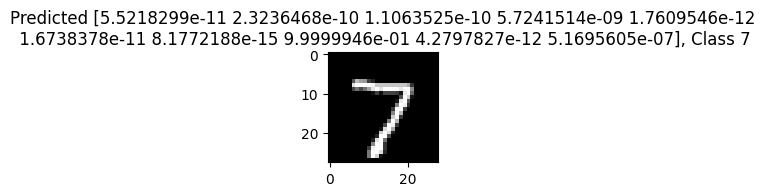

In [42]:
plt.figure()
for i, correct in enumerate(correct_indices[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(X_test[correct].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[correct], y_test[correct]))

plt.tight_layout()

plt.figure()
for i, incorrect in enumerate(incorrect_indices[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(X_test[incorrect].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[incorrect], y_test[incorrect]))

plt.tight_layout()
